testing

Reading in the csv

In [4]:
import numpy as np, pandas as pd, re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer as cntvec
from sklearn.feature_extraction.text import TfidfTransformer as tftrans

In [67]:
tweets = pd.read_csv(r"C:\Users\user\Downloads\politcian_trialdata.csv")

Creating functions that clean the text and export polarity

In [11]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment_polarity(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity 


In [37]:
def Convert(string): 
    li = list(string.split("', '")) 
    return li

In [68]:
for x in range(0, len(tweets['Comments'])):
    tweets['Comments'][x] = Convert(tweets['Comments'][x])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
tweets['Comments'][0] == ['[]']

True

In [85]:
tweets['Avg_Sent'] = np.NaN
tweets['SD_Sent'] = np.NaN
for x in range(0, len(tweets['Comments'])):
    for y in range(0, len(tweets['Comments'][x])):
        if tweets['Comments'][x]!= ['[]']:
            tweets['Comments'][x][y] = analize_sentiment_polarity(clean_tweet(tweets['Comments'][x][y]))
    try:
        tweets['Avg_Sent'][x] = np.mean(tweets['Comments'][x])
    except: 
        tweets['Avg_Sent'][x] = np.NaN
    try:
        tweets['SD_Sent'][x] = np.std(tweets['Comments'][y])  
    except:
        tweets['SD_Sent'][x] = np.NaN
    

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A 

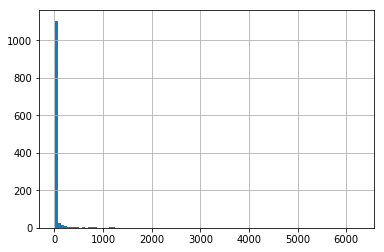

In [111]:
mylist = list()
for x in range(0, len(tweets['Comments'])):
    mylist.append(len(tweets['Comments'][x]))
pd.Series(mylist).hist(bins=100)

In [90]:
import seaborn as sns

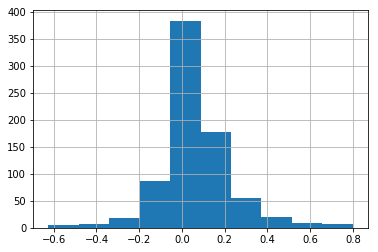

In [103]:
tweets['Avg_Sent'].hist()

In [114]:
tweets['Avg_Sent'].mean()

0.062188737766197356

In [117]:
from sklearn.feature_extraction.text import CountVectorizer as cntvec
from sklearn.feature_extraction.text import TfidfTransformer as tftrans

In [247]:
vectorizer = cntvec()
result = vectorizer.fit_transform(tweets['Text'])
wordtallys = pd.DataFrame(data=result.toarray(),columns=vectorizer.get_feature_names())
todrop = list()
mincount = .05
maxcount = np.percentile(wordtallys.mean(),99.7)
for x in range(0, len(wordtallys.columns)):
    if wordtallys.iloc[:,x].mean() < mincount:
        todrop.append(x)
    if wordtallys.iloc[:,x].mean() > maxcount:
        todrop.append(x)

shorttallys = wordtallys.drop(wordtallys.columns[todrop], axis=1)

In [248]:
tweetswithfeats = pd.concat([shorttallys,tweets],axis=1)

In [290]:
numeric_stuff = tweetswithfeats.select_dtypes(include=["float64","int64"])
numeric_stuff = numeric_stuff[numeric_stuff['Avg_Sent'].isnull()==False]
from sklearn.preprocessing import StandardScaler as sdscale
scaler =sdscale()
scaler.fit(numeric_stuff)
std_features = pd.DataFrame(scaler.transform(numeric_stuff))
std_features.columns=numeric_stuff.columns
target = std_features['Avg_Sent']
std_features = std_features.drop(columns=['Avg_Sent','SD_Sent'])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [286]:
myseries = pd.Series(numeric_stuff.corr()['Avg_Sent'])
abs(myseries).sort_values(ascending=False)[1:]

great         0.138758
should        0.087439
report        0.081306
full          0.078919
trump         0.077587
an            0.076428
about         0.071739
mueller       0.070511
be            0.069422
proud         0.065606
more          0.061112
help          0.059130
so            0.053292
Unnamed: 0    0.046604
Retweets      0.045467
Likes         0.044350
president     0.044343
public        0.041556
your          0.039634
people        0.039401
SD_Sent       0.037894
at            0.036469
congress      0.035550
their         0.035110
americans     0.034771
not           0.033272
special       0.032418
these         0.032006
who           0.030163
women         0.029979
his           0.029048
Length        0.028067
by            0.026524
health        0.025795
will          0.025101
from          0.024046
was           0.021404
house         0.019694
american      0.018925
but           0.018300
thank         0.016514
now           0.015154
what          0.014738
has        

In [298]:
from sklearn.linear_model import ElasticNetCV

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.99], alphas=[.06], cv=5, tol=10**-5)
clf.fit(std_features, target)
train_predictions = clf.predict(std_features)
print(clf.mse_path_.mean())
print(clf.alpha_)
print(clf.l1_ratio_)
clf.score(std_features, target)

0.9966360663294254
0.06
0.99


0.02668918783636609

In [304]:
clf.coef_[16]

0.0774885737689758

In [306]:
std_features.columns[16]

'great'